In [1]:
from graph_tool.all import *
from tqdm import tqdm
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
dys = pd.read_csv("../data/TCGA/dys_res_KIRC.csv", sep="\t")
sample_list = dys.iloc[:,0].tolist()
dys = dys[dys.columns[1:]]
dys.index = sample_list
dys_edges = dict(zip([e.replace("(", "").replace(")", "").replace("'", "").replace(" ", "") for e in dys.columns.tolist()], dys.iloc[0].tolist()))

In [11]:
g = load_graph("../data/graph-tool/allCelltypeGraph.gt")
epi_edges = {}
edges_to_mean = {}
for e in tqdm(g.edges()):
    e_name = f"{g.vp.name[e.source()]},{g.vp.name[e.target()]}"
    if e_name in dys_edges:
        if epi_edges.get(e_name) == None:
            edges_to_mean[e_name] = 1
            epi_edges[e_name] = g.ep.score[e]
        else:
            edges_to_mean[e_name] += 1
            epi_edges[e_name] = epi_edges.get(e_name) + g.ep.score[e]

2404861it [00:08, 269146.68it/s]


In [20]:
epi_edges_vals = []
for e in dys_edges:
    epi_edges_vals.append(epi_edges[e]/edges_to_mean[e])
dys_zscores = list(dys_edges.values())
epi_zscores = stats.zscore(epi_edges_vals)

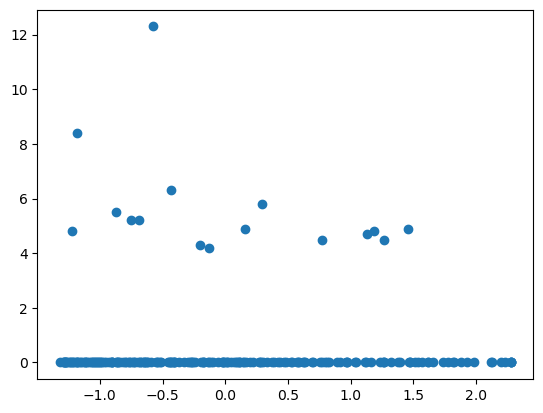

In [21]:
x = np.array(epi_zscores)
y = np.array(dys_zscores)
plt.scatter(x, y)

plt.show()

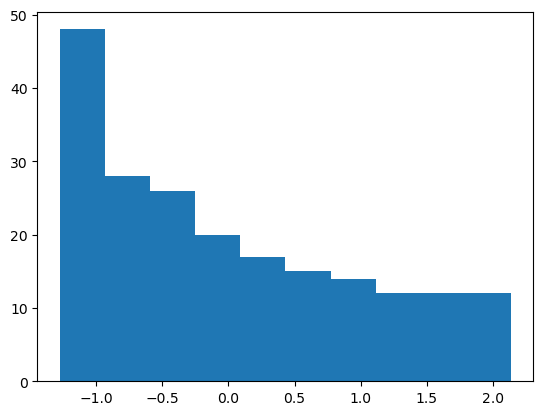

In [64]:
zscores = stats.zscore(epi_edges_vals)
plt.hist(zscores)

plt.show()